<a href="https://colab.research.google.com/github/AnuBaluguri/Optimizing-Network-Security-via-Ensemble-Learning/blob/main/Optimizing_Network_Security_via_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Assuming your CSV file path is correct (replace with yours)
data_path = '/content/drive/MyDrive/NID_data (1).csv'
data = pd.read_csv(data_path)

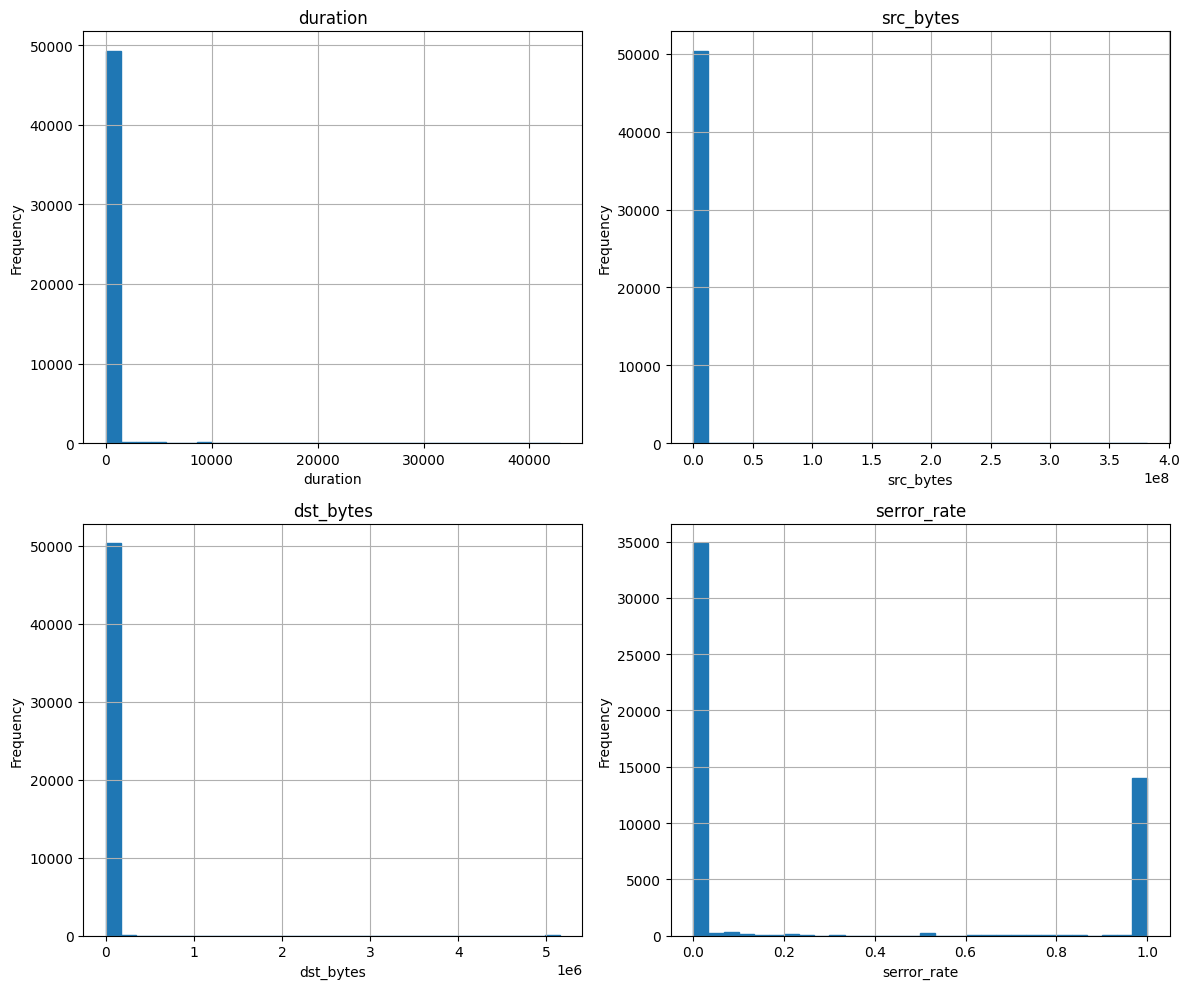

In [5]:
# Create subplots for the specified columns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot histogram for 'duration'
axes[0, 0].hist(data['duration'], bins=30, color='#1f77b4', edgecolor='#1f77b4')
axes[0, 0].set_title('duration')
axes[0, 0].set_xlabel('duration')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True)

# Plot histogram for 'src_bytes'
axes[0, 1].hist(data['src_bytes'], bins=30, color='#1f77b4', edgecolor='#1f77b4')
axes[0, 1].set_title('src_bytes')
axes[0, 1].set_xlabel('src_bytes')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True)

# Plot histogram for 'dst_bytes'
axes[1, 0].hist(data['dst_bytes'], bins=30, color='#1f77b4', edgecolor='#1f77b4')
axes[1, 0].set_title('dst_bytes')
axes[1, 0].set_xlabel('dst_bytes')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True)

# Plot histogram for 'serror_rate'
axes[1, 1].hist(data['serror_rate'], bins=30, color='#1f77b4', edgecolor='#1f77b4')
axes[1, 1].set_title('serror_rate')
axes[1, 1].set_xlabel('serror_rate')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [6]:
# Load data
train_data = pd.read_csv(data_path)

# Remove constant features
train_data = train_data.loc[:, train_data.apply(pd.Series.nunique) != 1]


In [7]:
# Separate features and target variable
X = train_data.drop('class', axis=1)
y = train_data['class']

In [8]:
# Encode categorical columns and standardize
X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

In [10]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [11]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Define the stacking ensemble
stack = StackingClassifier(
    estimators=[
        ('mlp', MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=1000, learning_rate_init=0.001)),
        ('knn', KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto')),
        ('gnb', GaussianNB()),
        ('dt', DecisionTreeClassifier(max_depth=10, min_samples_split=20, min_samples_leaf=10))
    ],
    final_estimator=LogisticRegression(),
    cv=5
)


In [12]:
# Train the stacking ensemble
stack.fit(X_train, y_train)


StackingClassifier(cv=5,
                   estimators=[('mlp',
                                MLPClassifier(hidden_layer_sizes=(128, 64),
                                              max_iter=1000)),
                               ('knn',
                                KNeighborsClassifier(weights='distance')),
                               ('gnb', GaussianNB()),
                               ('dt',
                                DecisionTreeClassifier(max_depth=10,
                                                       min_samples_leaf=10,
                                                       min_samples_split=20))],
                   final_estimator=LogisticRegression())

In [13]:
# Predictions and evaluation
y_pred = stack.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)  # 'weighted' takes class imbalance into account
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_mat)
print("F1 Score:", f1)

Accuracy: 0.9993053488141312
Precision: 0.9988824734587446
Recall: 0.999813571961223
Confusion Matrix:
 [[4707    6]
 [   1 5363]]
F1 Score: 0.9993478058324793
